In [1]:
import tensorflow as tf

In [2]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Input

from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from keras.datasets import mnist
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [8]:
data = mnist.load_data()

In [10]:
(x_train , y_train) , (x_test , y_test) = data

In [11]:
x_train.shape

(60000, 28, 28)

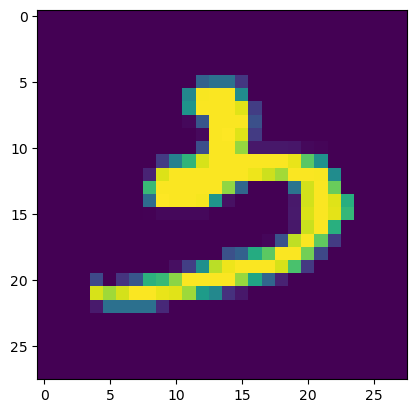

In [12]:
plt.imshow(x_train[32421])

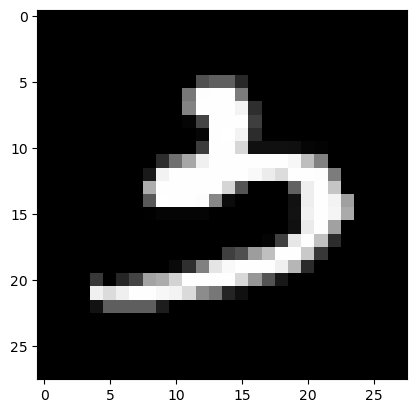

In [14]:
plt.imshow(x_train[32421], 'gray')

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
x_test.shape

(10000, 28, 28)

In [23]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

x_train_vector = x_train.reshape(60000,-1)
x_test_vector = x_test.reshape(10000,-1)

In [24]:
print(x_train_vector.max())
print(x_train_vector.min())

255
0


In [25]:
x_train_vector = x_train.reshape(60000,-1)/ 255.0
x_test_vector = x_test.reshape(10000,-1)/ 255.0

In [26]:
print(x_train_vector.max())
print(x_train_vector.min()) 

1.0
0.0


In [29]:
x_train_vector.shape[1]


784

In [30]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
model =  Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(784, activation= 'relu'))
model.add(Dense(256, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
res = model.fit(x_train_vector , y_train_one_hot , epochs= 15 , validation_data=(x_test_vector,y_test_one_hot))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9436 - loss: 0.1847 - val_accuracy: 0.9696 - val_loss: 0.0943
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9752 - loss: 0.0795 - val_accuracy: 0.9744 - val_loss: 0.0800
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9829 - loss: 0.0546 - val_accuracy: 0.9732 - val_loss: 0.0944
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9872 - loss: 0.0391 - val_accuracy: 0.9806 - val_loss: 0.0710
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9816 - val_loss: 0.0697
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9787 - val_loss: 0.0841
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 0.9805 - val_loss: 0.0790
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9938 - loss: 0

Text(0.5, 0, 'epoch')

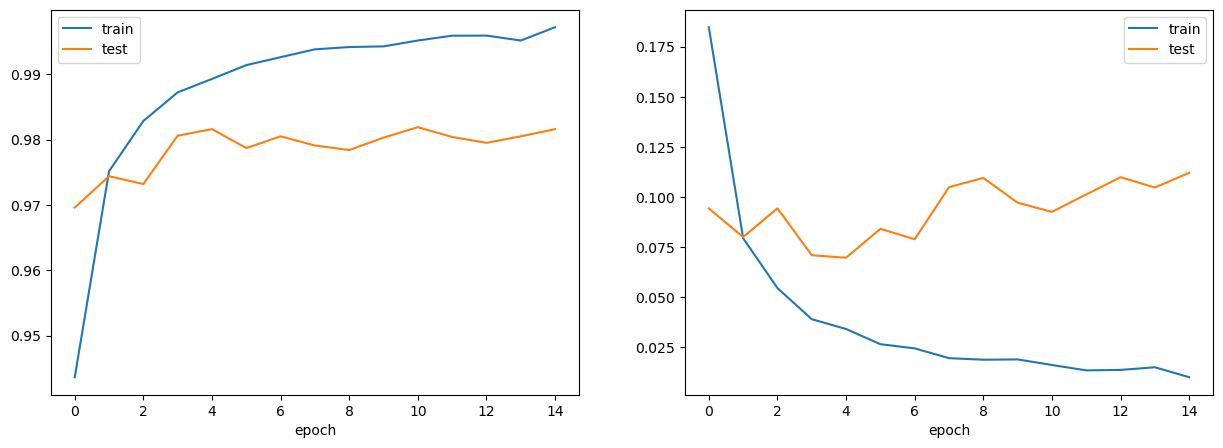

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train' , 'test' ] )
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train' , 'test' ] )
plt.xlabel('epoch')

In [39]:
model.save('model.h5')